### A Crop Recommendation System
A recommendation system that will take in the different environmental attributes such as 
the nitrogen, phosphorous, potassium content in the soil, temperature, etc., and predict 
what is the best crop that the user can plant so that it survives in the given climatic conditions.  

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import numpy as np

from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.linear_model import LogisticRegression
import seaborn as sns


In [22]:
# Load the dataset
data = pd.read_csv('Crop_recommendation.csv')
data

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [3]:
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


### The following inference can be made from the above information
- There are total 2200 entries
- For Each col, there are total 2200 entries this means no null values found.
- All the input variables are numerical type ie either float or integer.
- Output Label is of String Data Type( crop name)

#### Descriptive Analysis


In [5]:
data.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


#### Exploratory Data Analysis (EDA) 
- An approach to analyze data using visuals
- Used to discover trends and patterns.

In [9]:
# Return no of unique labels
data['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

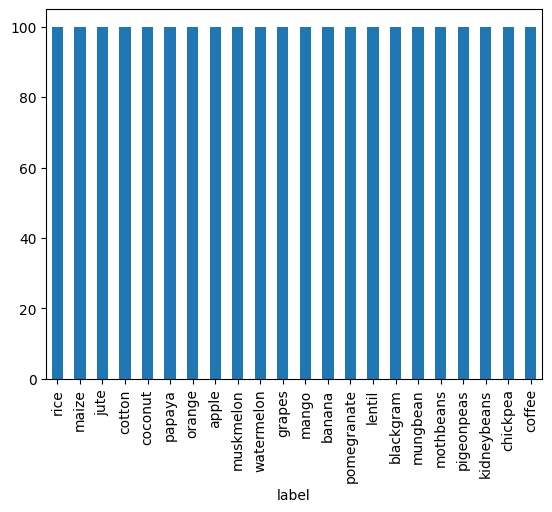

In [13]:
## Lets check whether the class provided in the dataset are balanced or not
# Return the value count of each class
val_count = data['label'].value_counts()
val_count.plot(kind = 'bar')
val_count 


C:\Users\magic\AppData\Local\Temp\ipykernel_38940\1756592819.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[feat] ,color='greenyellow')
C:\Users\magic\AppData\Local\Temp\ipykernel_38940\1756592819.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[feat] ,color='greenyellow')
C:\U

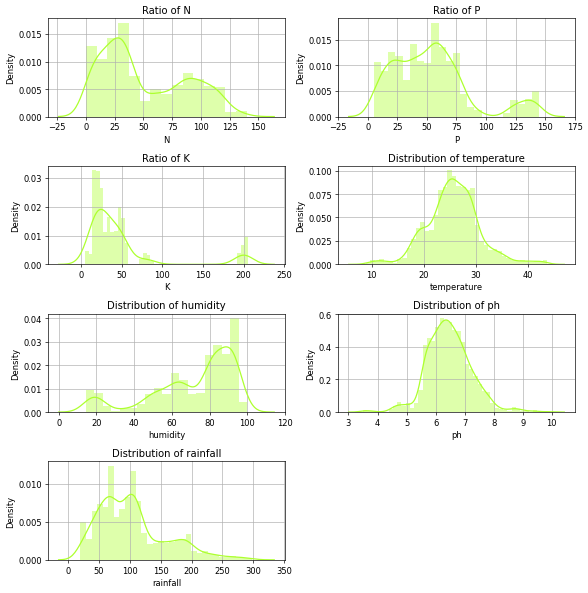

In [14]:
# over all distribution

plt.rcParams['figure.figsize'] = (10,10)
plt.rcParams['figure.dpi'] = 60
features = ['N','P','K','temperature' , 'humidity' , 'ph' , 'rainfall' ]

for i, feat in enumerate(features):
    plt.subplot(4, 2, i+1)
    sns.distplot(data[feat] ,color='greenyellow')
    if i<3:
        plt.title(f'Ratio of {feat}', fontsize=12) 
    else: 
        plt.title(f'Distribution of {feat}', fontsize=12) 
    plt.tight_layout() 
    plt.grid() 
    

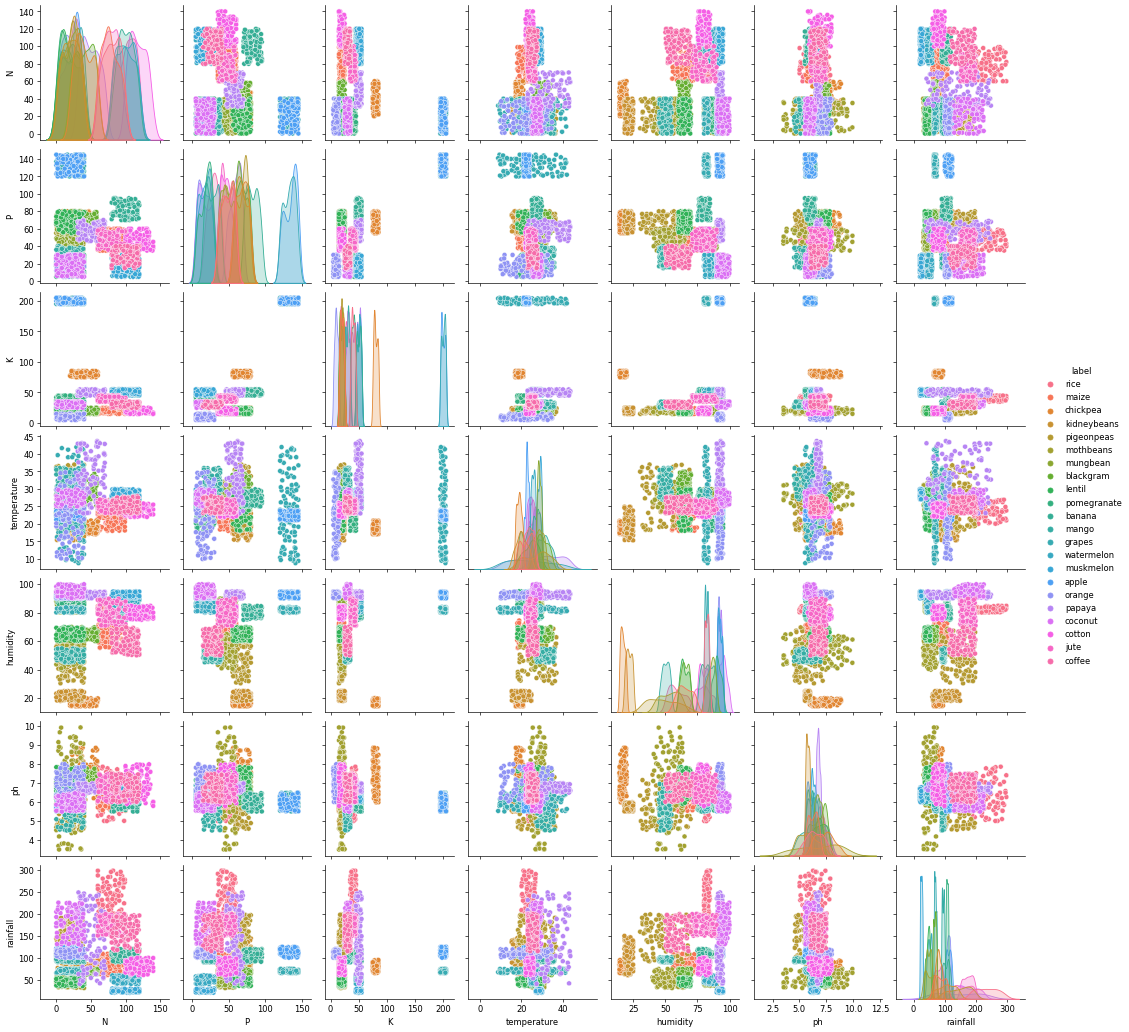

In [15]:
# Feature vs Feature Distributions for diff crops
# pairplot to identify any significant relationship between 2 features
sns.pairplot(data, hue='label')

In [20]:
data=data.drop(columns =['label'])

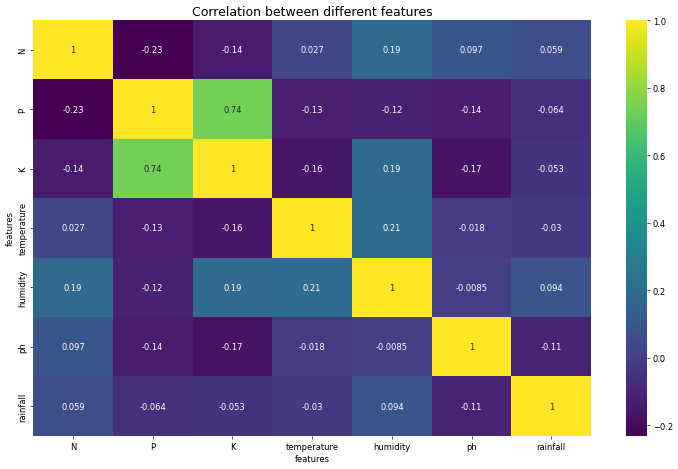

In [21]:
## Correlation between features
fig, ax = plt.subplots(1, 1, figsize=(15, 9)) 
sns.heatmap(data.corr(), 
            annot=True, 
            cmap='viridis') 
ax.set(xlabel='features') 
ax.set(ylabel='features') 
  
plt.title('Correlation between different features', 
          fontsize=15, 
          c='black') 
plt.show() 

Apart from K vs P , there are no two highly correlated features

In [23]:
#Split the dataset
features = data.drop(columns = ['label']) 
labels = data['label']


Model Training

In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(features,
                                                    labels, 
                                                    test_size=0.2,
                                                    random_state=42)

Logistic Regression

In [30]:
LogReg = LogisticRegression(random_state=42).fit(X_train, Y_train) 
  
# Predict the values for the test dataset 
predicted_values = LogReg.predict(X_test) 
  
# Measure the accuracy of the test  
# set using accuracy_score metric 
accuracy = metrics.accuracy_score(Y_test, 
                                  predicted_values) 


C:\Users\magic\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [31]:
# Find the accuracy of the model 
print("Logistic Regression accuracy: ", accuracy)

Logistic Regression accuracy:  0.9454545454545454


In [32]:
# Get detail metrics  
print(metrics.classification_report(Y_test, 
                                    predicted_values))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       0.95      1.00      0.98        21
   blackgram       0.83      0.75      0.79        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       0.94      1.00      0.97        17
      cotton       0.80      0.94      0.86        17
      grapes       1.00      1.00      1.00        14
        jute       0.91      0.87      0.89        23
 kidneybeans       1.00      0.95      0.97        20
      lentil       0.83      0.91      0.87        11
       maize       0.94      0.76      0.84        21
       mango       0.95      1.00      0.97        19
   mothbeans       0.85      0.92      0.88        24
    mungbean       0.95      1.00      0.97        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      1.00      1.00        14
      papaya       0.95    